# Logistic Regression

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [4]:
data =load_breast_cancer()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target)

In [5]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
y.describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Visualization – Feature Correlation
shows multicollinearity

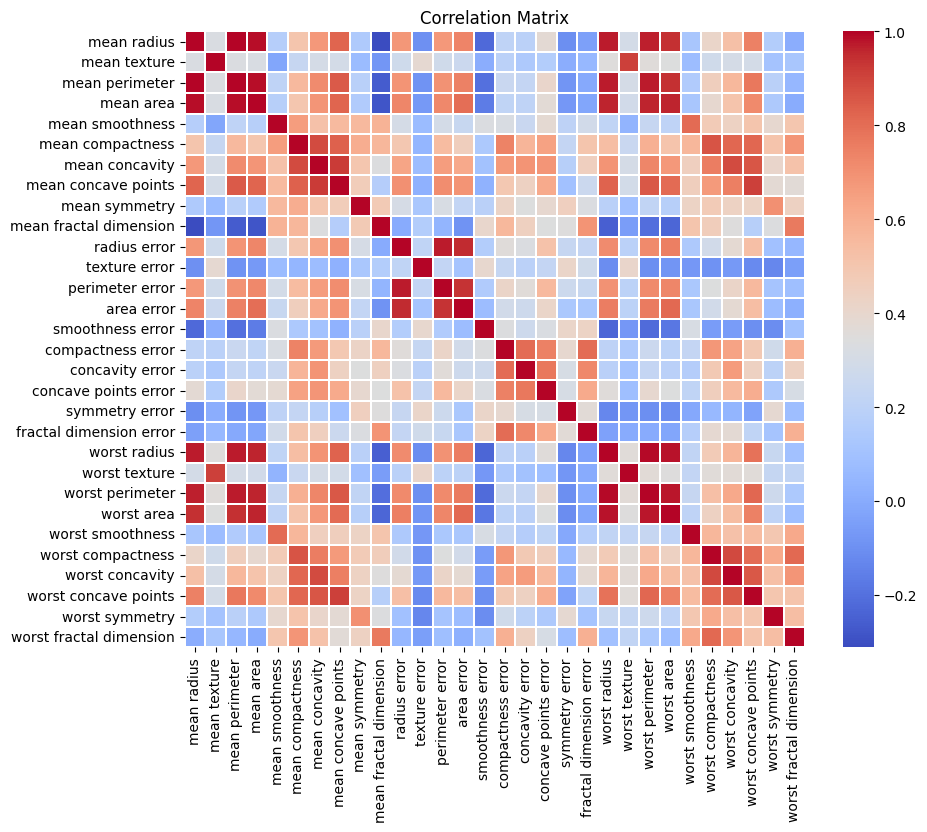

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),cmap='coolwarm',linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Feature Scaling (MANDATORY)

1.  Logistic regression regularization penalizes coefficients
2.  Without scaling → incorrect penalties





In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Logistic Regression + GridSearchCV (L1 & L2)
l2	- Ridge (shrinks coefficients)

l1	- Lasso (feature selection)

**C (Regularization Strength)**

C = 1/lambda

**max_iter**

1. Maximum optimization iterations

2. Needed for convergence (especially L1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='saga')

C ={"C":[0.001,0.01,0.1,1,10,100,1000]}
penalty = {"penalty":["l1","l2"]}
max_iter = {"max_iter":[100,1000,10000]}

param_grid ={
    "C":[0.001,0.01,0.1,1,10,100,1000],
    "penalty":["l1","l2"],
    "max_iter":[100,1000,10000]
}
grid_log=GridSearchCV(log_reg,param_grid,cv=5,n_jobs=-1,verbose=1)
grid_log.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

# L1 vs L2 Coefficient Comparison

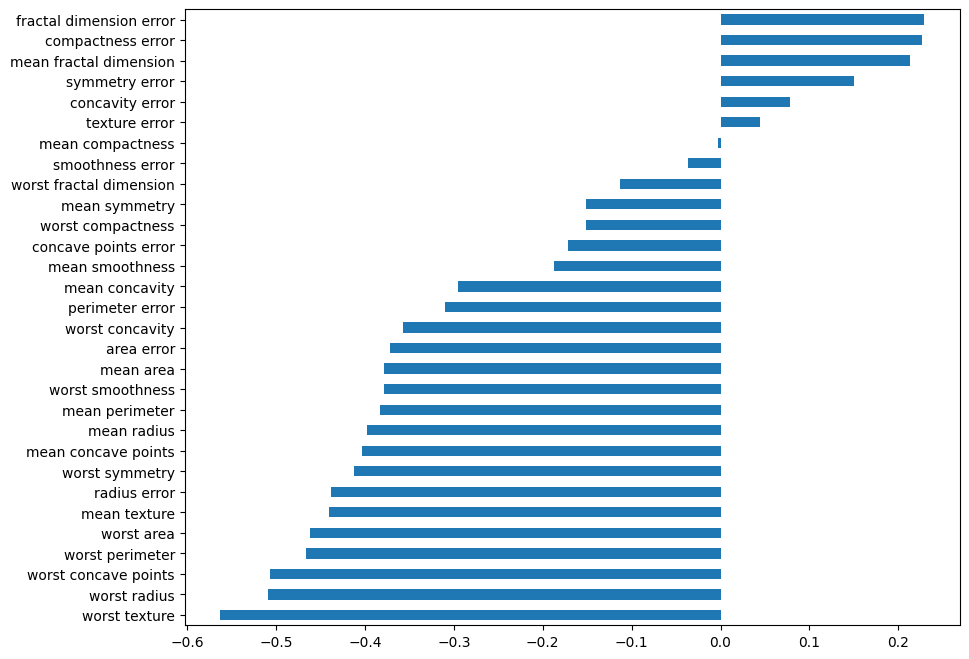

In [22]:

best_model = grid_log.best_estimator_
coef = pd.Series(best_model.coef_[0],index=X.columns)
coef.sort_values().plot(kind='barh',figsize=(10,8))
plt.show();

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


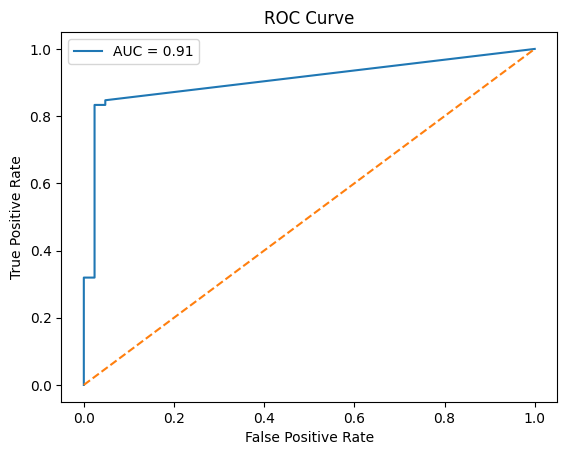

In [24]:
from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = %.2f" % auc(fpr, tpr))
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
